In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
#df = pd.read_csv(".\\Data_USD.csv", header=None,skiprows=1)
df = pd.read_csv(".\\Data_USD.csv")
#df.head().to_csv(".\\test.csv")

In [3]:
T=df.groupby("SEX") 

In [4]:
T.describe()

LIMIT_BAL_US                                                     \
           count         mean          std         min          25%   
SEX                                                                   
1        11888.0  5933.433651  4943.946037  362.857143  1814.285714   
2        18112.0  6171.708764  4544.124514  362.857143  2540.000000   

                                           EDUCATION            ...  \
             50%          75%          max     count      mean  ...   
SEX                                                             ...   
1    4717.142857  8708.571429  29028.57143   11888.0  1.839250  ...   
2    5442.857143  8708.571429  36285.71429   18112.0  1.862246  ...   

    CREDIT_UTILIZATION         DEFAULT_PAYMENT_NEXT_MO                      \
                   75%     max                   count      mean       std   
SEX                                                                          
1             0.867975  4.1406                 11888.0  0.241672  0.428115   
2             0.792862  6.4553                 18112.0  0.207763  0.405717   

                              
     min  25%  50%  75%  max  
SEX                           
1    0.0  0.0  0.0  0.0  1.0  
2    0.0  0.0  0.0  0.0  1.0  

[2 rows x 80 columns]

In [5]:
df.tail()

,LIMIT_BAL_US,SEX,EDUCATION,MARRIAGE,AGE,PAY_SCORE_AVG,BILL_AVG_US,PAY_AMT_AVG_US,PAY_TO_BILL,CREDIT_UTILIZATION,DEFAULT_PAYMENT_NEXT_MO
29995,7982.857143,1,3,1,39,0.00,4386.634429,257.326190,0.06,0.858855,0
29996,5442.857143,1,3,2,43,-0.67,128.100667,87.630000,0.68,0.011220,0
29997,1088.571429,1,2,2,37,1.33,426.332952,189.290476,0.44,0.118833,1
29998,2902.857143,1,3,1,41,-0.17,1612.361762,890.094619,0.55,-0.020563,1
29999,1814.285714,1,2,1,46,0.00,1396.238000,50.243619,0.04,0.958580,1


In [6]:
# X = df.drop('Y_Value',axis =1).values
# y = df['Y_Value'].values
X = df.drop('DEFAULT_PAYMENT_NEXT_MO',axis =1).values
#X[2999,0]

In [7]:
X.shape

(30000, 10)

In [8]:
y = df['DEFAULT_PAYMENT_NEXT_MO'].values
#y.reshape(-1,1)

In [9]:
#print(X.shape)
X.shape

(30000, 10)

In [10]:
#print(y.shape)
y.shape

(30000,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.3, random_state=42)

In [12]:
y_test.T

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
X_test.shape

(9000, 10)

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [15]:
X_scaler

StandardScaler()

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
X_train_scaled

array([[ 0.56391448,  0.80648893, -1.07681763, ..., -0.49741723,
         0.09035743, -1.02549459],
       [-0.90610925,  0.80648893, -1.07681763, ..., -0.13590122,
         0.08737206, -0.85894506],
       [-0.90610925,  0.80648893,  0.18648797, ..., -0.33785543,
        -0.05294013,  1.2179713 ],
       ...,
       [-0.90610925, -1.23994262, -1.07681763, ..., -0.49741723,
         0.09035743, -1.02549459],
       [-0.75136991,  0.80648893,  0.18648797, ..., -0.31133477,
        -0.05294013,  1.53895893],
       [-0.05504288,  0.80648893,  0.18648797, ..., -0.11985747,
         0.10229889, -1.02579807]])

In [18]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [19]:
from keras.models import Sequential

#instantiate
model = Sequential()

In [20]:
from keras.layers import Dense

number_inputs = 10
number_hidden = 30

model.add(Dense(units = number_hidden, activation ='relu', input_dim=number_inputs))
model.add(Dense(units = 20, activation ='relu')) #second hidden layer
model.add(Dense(units = 12, activation ='relu')) #second hidden layer
model.add(Dense(units = 2, activation ='relu')) #third hidden layer

In [21]:
number_classes =2 ## yes or no
model.add(Dense(units = number_classes, activation = 'sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                252       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 26        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
Total params: 1,234
Trainable params: 1,234
Non-trainable params: 0
_________________________________________________________________


In [23]:
#compile the model
model.compile(optimizer = 'sgd' ,
             loss = 'categorical_crossentropy',
             metrics =['accuracy'])

In [24]:
#train the model

model.fit(X_train_scaled, y_train_categorical, epochs=100,shuffle = True,verbose =2)

Epoch 1/100
 - 2s - loss: 0.6158 - accuracy: 0.7633
Epoch 2/100
 - 1s - loss: 0.5472 - accuracy: 0.7773
Epoch 3/100
 - 2s - loss: 0.5335 - accuracy: 0.7773
Epoch 4/100
 - 2s - loss: 0.5309 - accuracy: 0.7773
Epoch 5/100
 - 2s - loss: 0.5304 - accuracy: 0.7773
Epoch 6/100
 - 2s - loss: 0.5302 - accuracy: 0.7773
Epoch 7/100
 - 2s - loss: 0.5301 - accuracy: 0.7773
Epoch 8/100
 - 2s - loss: 0.5300 - accuracy: 0.7773
Epoch 9/100
 - 2s - loss: 0.5298 - accuracy: 0.7773
Epoch 10/100
 - 2s - loss: 0.5291 - accuracy: 0.7773
Epoch 11/100
 - 2s - loss: 0.5257 - accuracy: 0.7773
Epoch 12/100
 - 2s - loss: 0.5126 - accuracy: 0.7773
Epoch 13/100
 - 1s - loss: 0.4949 - accuracy: 0.7782
Epoch 14/100
 - 2s - loss: 0.4832 - accuracy: 0.7802
Epoch 15/100
 - 2s - loss: 0.4769 - accuracy: 0.7857
Epoch 16/100
 - 1s - loss: 0.4732 - accuracy: 0.7967
Epoch 17/100
 - 2s - loss: 0.4710 - accuracy: 0.8003
Epoch 18/100
 - 2s - loss: 0.4694 - accuracy: 0.8026
Epoch 19/100
 - 2s - loss: 0.4682 - accuracy: 0.8037
Ep

In [25]:
model.save("ccneuralnetwork.h5")

In [26]:
#quantify the model
model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test_categorical,verbose =2)
print( model_loss )
print (model_accuracy)

0.44793692753050063
0.8056666851043701


F1, Precision Recall, and Confusion Matrix

In [27]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [28]:
y_prediction = model.predict_classes(X_test)

In [29]:
y_prediction.reshape(-1,1)

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [30]:
print("Recall score:"+ str(recall_score(y_test, y_prediction)))

Recall score:0.27193877551020407


In [31]:
print(classification_report(y_test, y_prediction,
                            target_names=["default", "non_default"]))

              precision    recall  f1-score   support

     default       0.81      0.84      0.82      7040
 non_default       0.33      0.27      0.30      1960

    accuracy                           0.72      9000
   macro avg       0.57      0.56      0.56      9000
weighted avg       0.70      0.72      0.71      9000



In [32]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[5939 1101]
 [1427  533]]
Normalized confusion matrix
[[0.84 0.16]
 [0.73 0.27]]


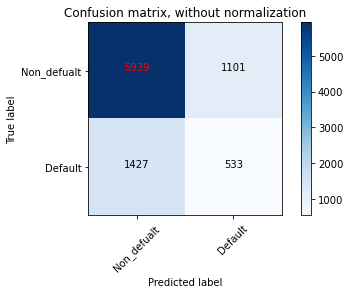

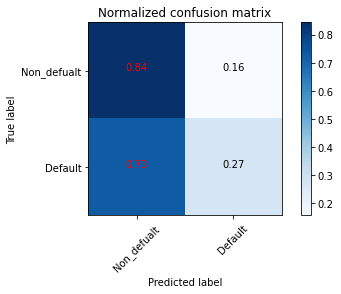

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_defualt', 'Default'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_defualt', 'Default'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()